<font size=7> Autocuration Check - Neuron Comparison

In [1]:
import smart_open
import zipfile
import pickle

import numpy as np
#from human_hip.spike_data import read_phy_files, text_summary, plot_raster, plot_matrices_connectivity
import  human_hip.spike_data  as spikedata
from braingeneers.analysis.analysis import SpikeData
from matplotlib import pyplot as plt
from ipywidgets import  interact_manual

In [21]:
print(" "); print("sd hand")
sd_hand = spikedata.read_phy_files('/workspaces/human_hippocampus/data/ephys/2022-11-02-e-Hc11.1-chip16753/derived/kilosort2/hc11.1_plated-11.1_chip-16753_rec_11.2.22AM-immediate_curated.zip')
spikedata.text_summary( sd_hand )

print(" "); print("sd auto")
sd_auto = spikedata.read_autocurated_data("/workspaces/human_hippocampus/data/ephys/2022-11-02-e-Hc11.1-chip16753/derived/kilosort2/hc11.1_plated-11.1_chip-16753_rec_11.2.22AM-immediate_qm_rd.zip")
spikedata.text_summary( sd_auto )

print(" "); print("sd hand only")
sd_hand_only = pickle.load( open("sd_hand_only.pkl", "rb") )
spikedata.text_summary( sd_hand_only )

 
sd hand
Number of spikes:  49667
Length:  418 seconds
Number of Neurons:  87
Average Firing Rate:  1.36
Coefficient of Variation:  0.546
 
sd auto
Number of spikes:  11052
Length:  418 seconds
Number of Neurons:  18
Average Firing Rate:  1.47
Coefficient of Variation:  0.503
 
sd hand only
Number of spikes:  39405
Length:  418 seconds
Number of Neurons:  73
Average Firing Rate:  1.29
Coefficient of Variation:  0.495


(<Axes: xlabel='Time (s)', ylabel='Unit'>,
 <Axes: xlabel='Time (s)', ylabel='Population Firing Rate (Hz)'>)

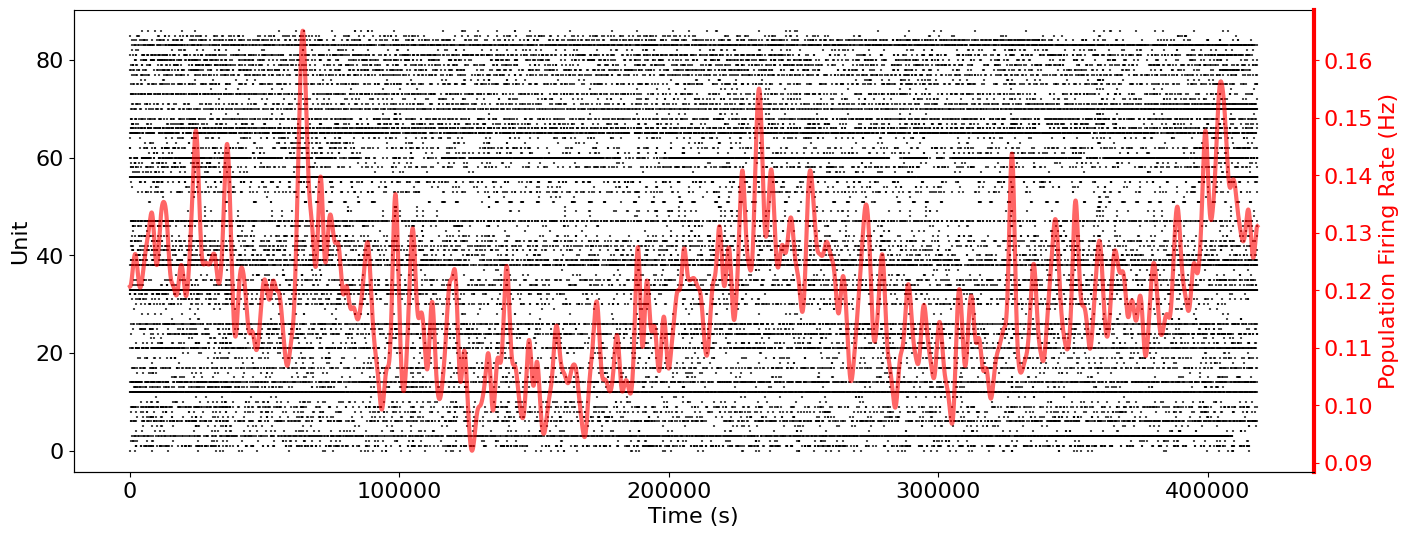

In [16]:
spikedata.plot_raster(sd_hand)

# SD old

In [23]:
sd_old = spikedata.read_phy_files('/workspaces/human_hippocampus/data/ephys/2023-04-02-e-hc328_unperturbed/derived/kilosort2/hc3.28_hckcr1_chip16835_plated34.2_rec4.2_curated_s1.zip')



(<Axes: xlabel='Time (s)', ylabel='Unit'>,
 <Axes: xlabel='Time (s)', ylabel='Population Firing Rate (Hz)'>)

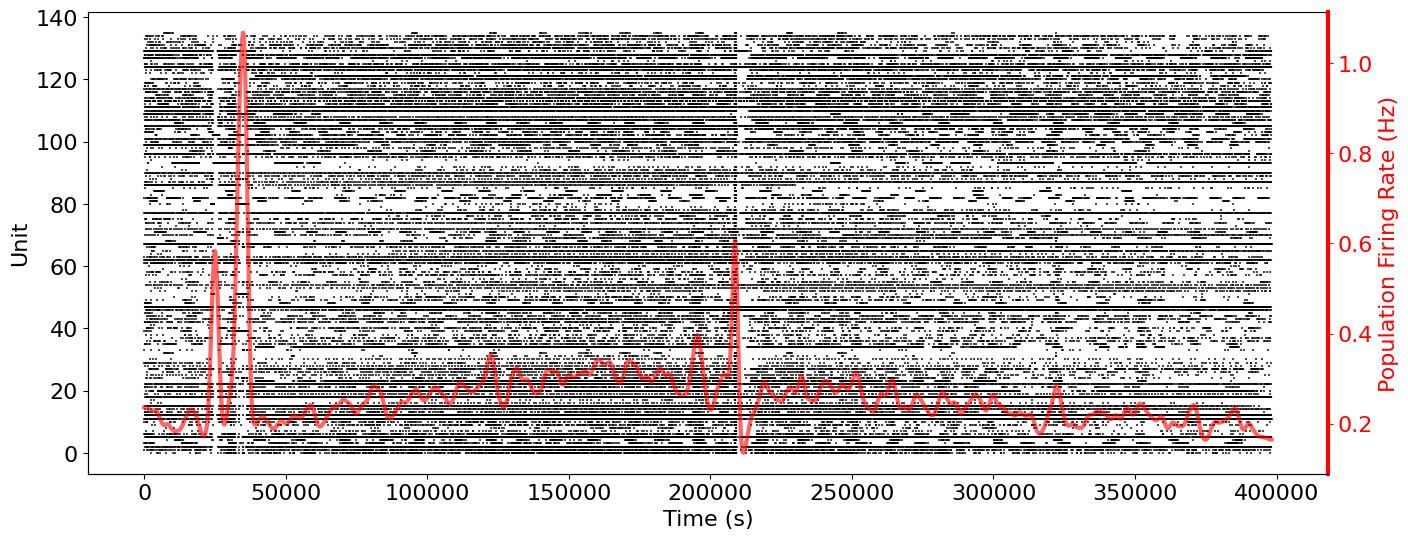

In [25]:
spikedata.plot_raster(sd_old)

(<Axes: xlabel='Time (s)', ylabel='Unit'>,
 <Axes: xlabel='Time (s)', ylabel='Population Firing Rate (Hz)'>)

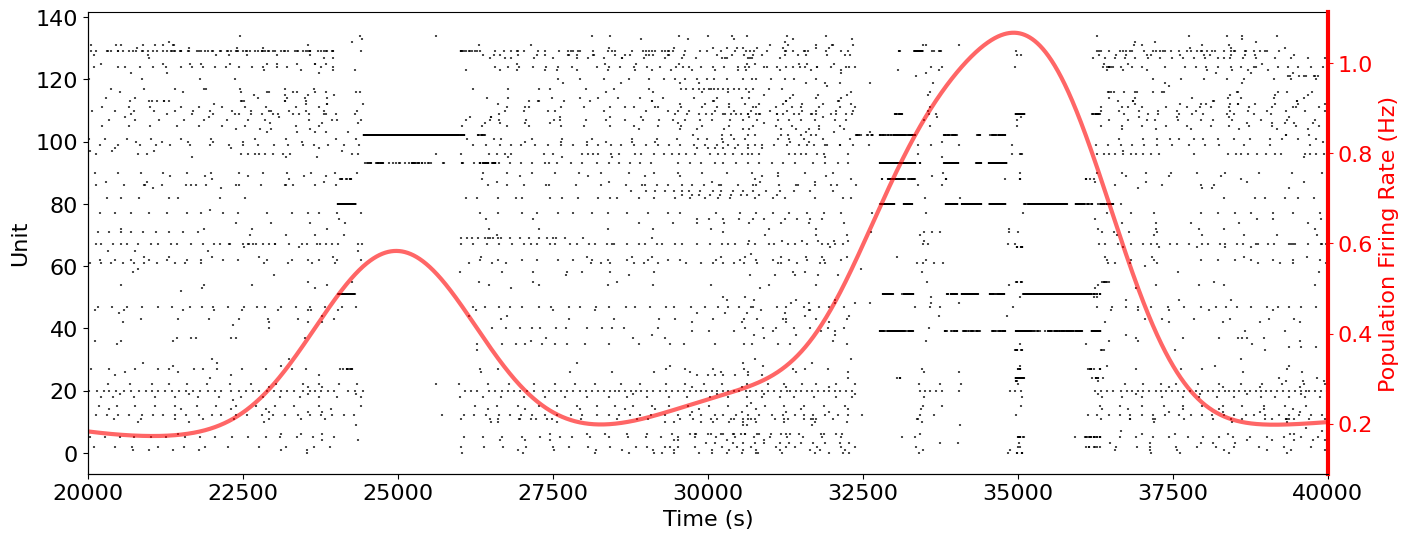

In [27]:
spikedata.plot_raster( sd_old, xlim=(20000,40000) )

(<Axes: xlabel='Time (s)', ylabel='Unit'>,
 <Axes: xlabel='Time (s)', ylabel='Population Firing Rate (Hz)'>)

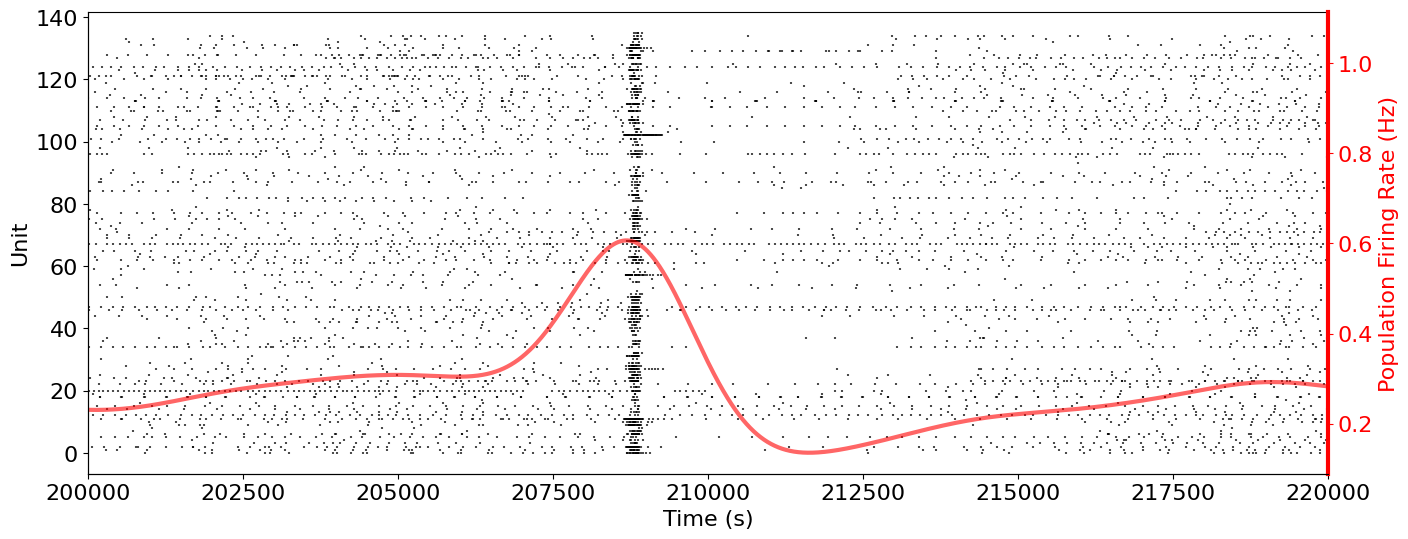

In [29]:
spikedata.plot_raster( sd_old , xlim=(200000,220000) )

# <font color="brown"> Make sd hand only

In [29]:
ids_hand = [ val["cluster_id"] for key,val in sd_hand.neuron_data[0].items() ]
ids_auto =  [ val["cluster_id"] for key,val in sd_auto.neuron_data[0].items() ]

/tmp/ipykernel_1779/330788097.py:1: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  ids_hand = [ val["cluster_id"] for key,val in sd_hand.neuron_data[0].items() ]


In [45]:
hand_only = []
for key,val in sd_hand.neuron_data[0].items():
    if val["cluster_id"] not in  ids_auto:
        hand_only.append( key )

/tmp/ipykernel_1779/176884347.py:2: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for key,val in sd_hand.neuron_data[0].items():


In [46]:
print(len( hand_only ))
print(len(ids_auto))
print(sd_hand.N)
print(18 - (87-73))

73

<font color="orange"> What the above numbers tell us is that there are some auto_curated neurons that were removed from the hand curation. Specifically 4 neurons.

In [66]:
train_hand_only = [ sd_hand.train[i] for i in hand_only ]

neuron_data_hand  = {0:{}}
for i in range(len(hand_only)):
    neuron_data_hand[0][i] = sd_hand.neuron_data[0][hand_only[i]]

/tmp/ipykernel_1779/3508067692.py:5: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  neuron_data_hand[0][i] = sd_hand.neuron_data[0][hand_only[i]]


In [69]:
sd_hand_only = SpikeData(train_hand_only, length=sd_hand.length, N=len(train_hand_only), neuron_data=neuron_data_hand)

In [70]:
# with open("sd_hand_only.pkl", "wb") as f:
#     pickle.dump( sd_hand_only, f )

In [71]:
sd_hand_only = pickle.load( open("sd_hand_only.pkl", "rb") )

# Analyze autocurated sd

In [5]:
spikedata.text_summary( sd_auto )

Number of spikes:  11052
Length:  418 seconds
Number of Neurons:  18
Average Firing Rate:  1.47
Coefficient of Variation:  0.503


In [30]:
spikedata.plot_raster

<function human_hip.spike_data.plot_raster.plot_raster(sd, title='', axs=None, xlim=None, smoothness=1000, size=(16, 6))>

(<Axes: xlabel='Time (s)', ylabel='Unit'>,
 <Axes: xlabel='Time (s)', ylabel='Population Firing Rate (Hz)'>)

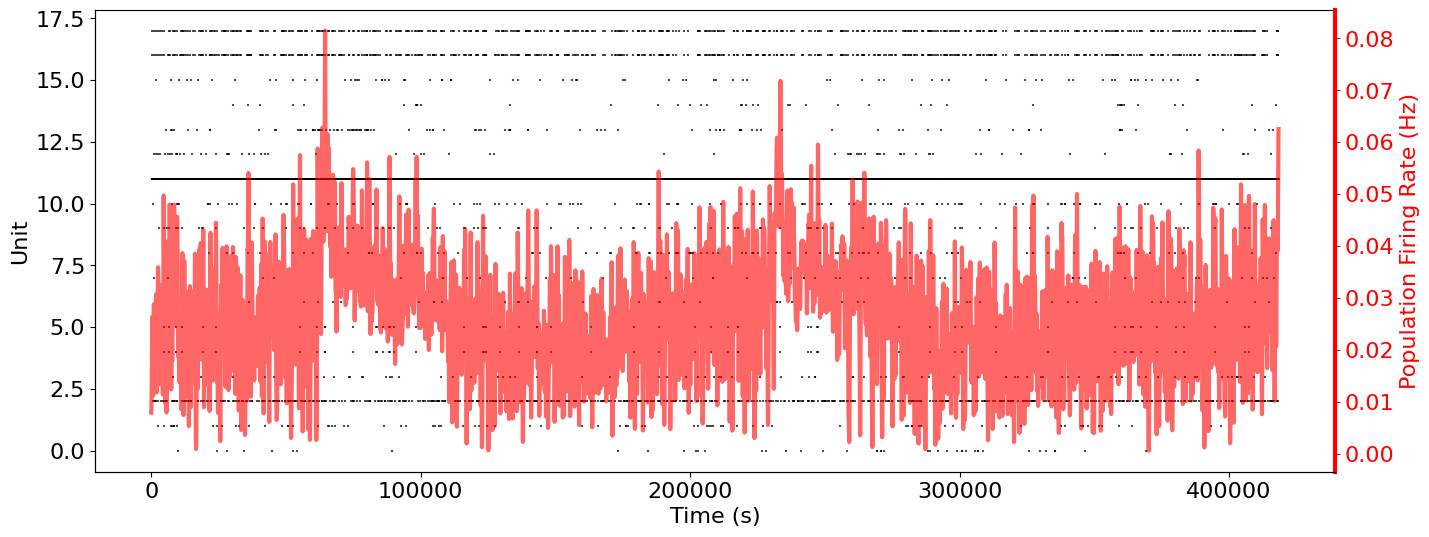

In [32]:
spikedata.plot_raster( sd_auto, smoothness=100)

In [45]:
@interact_manual
def check_neuron( neuron_id=(0,sd_auto.N-1)):
    isi = sd_auto.interspike_intervals()[neuron_id]
    plt.hist( isi[isi<20] , bins=50)
    plt.show()
    spikedata.plot_waveform_layout( neuron_id, sd_auto)

interactive(children=(IntSlider(value=8, description='neuron_id', max=17), Button(description='Run Interact', …

# Analyze hand only sd

In [7]:
spikedata.text_summary( sd_hand_only )

Number of spikes:  39405
Length:  418 seconds
Number of Neurons:  73
Average Firing Rate:  1.29
Coefficient of Variation:  0.495


(<Axes: xlabel='Time (s)', ylabel='Unit'>,
 <Axes: xlabel='Time (s)', ylabel='Population Firing Rate (Hz)'>)

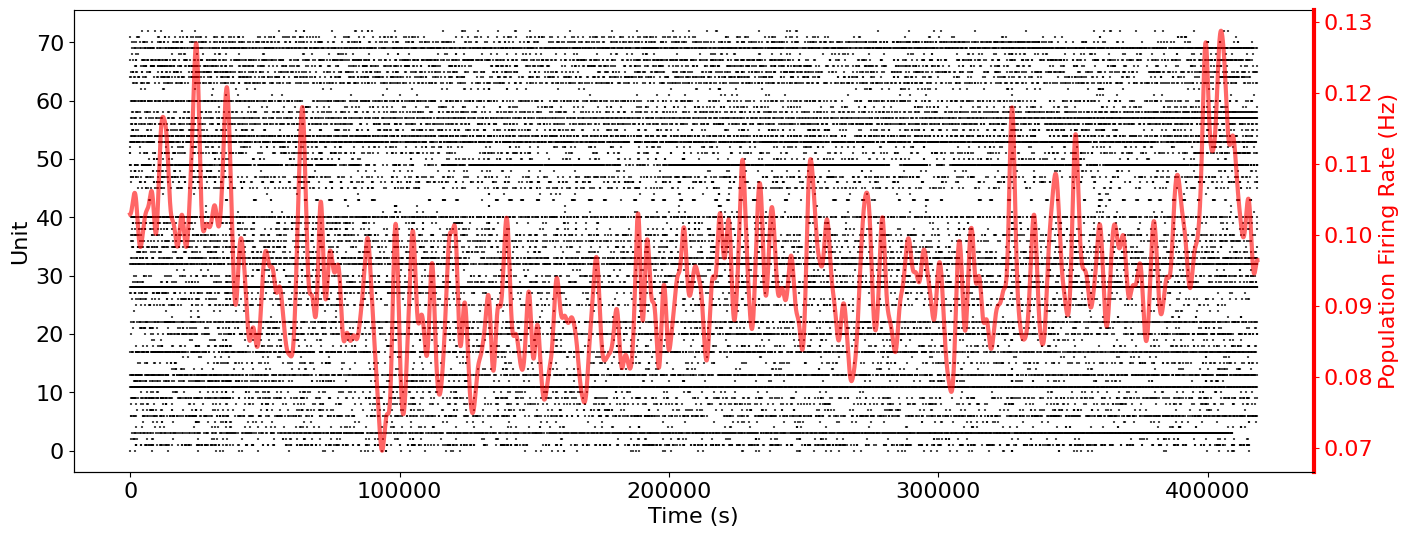

In [8]:
spikedata.plot_raster(sd_hand_only)

In [46]:
@interact_manual
def check_neuron( neuron_id=(0,sd_hand_only.N-1)):
    isi = sd_hand_only.interspike_intervals()[neuron_id]
    plt.hist( isi[isi<20] , bins=50)
    plt.show()
    spikedata.plot_waveform_layout( neuron_id, sd_hand_only)

interactive(children=(IntSlider(value=36, description='neuron_id', max=72), Button(description='Run Interact',…